# Assignment 4

# Name-Rishav Raj
# USN-17BTRCS045

# Task 1- Implement Hidden Markov Model

In [1]:
#Import the libraries

import numpy as np     #For Mathematical calculation
import pandas as pd    #For Data Manipulation
import matplotlib.pyplot as plt      #For Data Visualization
import io,base64,os,json,re
import datetime
from random import randint
%matplotlib inline

For Dataset we have taken data from American stock market and from Yahoo Finances 
Having Date from 2010-01-01 to till date

In [2]:
#(https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC)

gspc_df=pd.read_csv('^GSPC.csv')
gspc_df['Date']=pd.to_datetime(gspc_df['Date'])
cut_off_date='2010-01-01'
gspc_df=gspc_df[gspc_df['Date']>=cut_off_date]
gspc_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
20593,2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
20594,2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
20595,2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
20596,2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
20597,2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000


In [3]:
# now we will take some random sets of sequential rows

new_set=[]
for row_set in range(0,100000):
    if row_set%2000==0: 
        print(row_set)
    row_quant=randint(10,30)
    row_start=randint(0,len(gspc_df)-row_quant)
    market_subset=gspc_df.iloc[row_start:row_start+row_quant]
    
    Close_Date=max(market_subset['Date'])
    if row_set%2000==0: 
        print(Close_Date)
        
#Formulas for calculations
# Close_Gap = (market_subset['Close'] - market_subset['Close'].shift(1)) / market_subset['Close'].shift(1)
        
    Close_Gap=market_subset['Close'].pct_change()
    High_Gap=market_subset['High'].pct_change()
    Low_Gap=market_subset['Low'].pct_change()
    Volume_Gap=market_subset['Volume'].pct_change()
    Daily_Change=(market_subset['Close']-market_subset['Open']) / market_subset['Open']
    Outcome_Next_Day_Direction=(market_subset['Volume'].shift(-1)-market_subset['Volume'])
    
    new_set.append(pd.DataFrame({'Seqeunce_ID':[row_set]*len(market_subset),
                                'Close_Date':[Close_Date]*len(market_subset),
                                 'Close_Gap':Close_Gap,
                                 'High_Gap':High_Gap,
                                 'Low_Gap':Low_Gap,
                                 'Volume_Gap':Volume_Gap,
                                 'Daily_Change':Daily_Change,
                                 'Outcome_Next_Day_Direction':Outcome_Next_Day_Direction
                                
                                }))
    
#P.S: It will take 10-15 minutes to run(Without GPU)   

0
2014-06-26 00:00:00
2000
2012-09-28 00:00:00
4000
2013-12-09 00:00:00
6000
2012-04-10 00:00:00
8000
2015-07-17 00:00:00
10000
2011-06-27 00:00:00
12000
2020-09-10 00:00:00
14000
2010-12-09 00:00:00
16000
2014-06-24 00:00:00
18000
2019-08-15 00:00:00
20000
2011-08-22 00:00:00
22000
2012-08-23 00:00:00
24000
2010-05-07 00:00:00
26000
2014-11-18 00:00:00
28000
2011-02-18 00:00:00
30000
2011-02-07 00:00:00
32000
2020-10-15 00:00:00
34000
2017-03-07 00:00:00
36000
2018-08-01 00:00:00
38000
2014-07-29 00:00:00
40000
2020-03-23 00:00:00
42000
2016-05-27 00:00:00
44000
2017-08-29 00:00:00
46000
2012-11-21 00:00:00
48000
2012-02-17 00:00:00
50000
2012-07-03 00:00:00
52000
2018-07-02 00:00:00
54000
2010-07-21 00:00:00
56000
2011-12-14 00:00:00
58000
2013-05-09 00:00:00
60000
2015-03-25 00:00:00
62000
2012-08-23 00:00:00
64000
2016-04-01 00:00:00
66000
2011-10-31 00:00:00
68000
2011-12-16 00:00:00
70000
2019-11-06 00:00:00
72000
2016-07-28 00:00:00
74000
2014-07-17 00:00:00
76000
2018-01-09 00:

In [4]:
len(market_subset)

29

In [33]:
#Here we are creating new dataframes using concatenation option

new_set_df=pd.concat(new_set)
print(new_set_df.shape)
new_set_df=new_set_df.dropna(how='any')
print(new_set_df.shape)
new_set_df.tail(20)

(1997639, 8)
(1797639, 8)


,Seqeunce_ID,Close_Date,Close_Gap,High_Gap,Low_Gap,Volume_Gap,Daily_Change,Outcome_Next_Day_Direction
20871,99999,2011-03-10,-0.002786,-0.000249,-0.000866,0.010488,-0.001210,2.623700e+08
20872,99999,2011-03-10,0.000749,-0.001329,-0.002396,0.066893,0.002837,3.469000e+07
20873,99999,2011-03-10,0.005507,0.006055,0.003309,0.008290,0.007955,-6.522600e+08
20874,99999,2011-03-10,0.002385,0.001631,0.008221,-0.154590,0.002702,3.598200e+08
20875,99999,2011-03-10,-0.003235,-0.001898,-0.001726,0.100874,-0.001819,-1.960410e+09
20876,99999,2011-03-10,0.006257,0.005397,0.003699,-0.499231,0.005122,0.000000e+00
20877,99999,2011-03-10,0.003076,0.002908,0.001121,0.000000,0.004542,-8.041400e+08
20878,99999,2011-03-10,0.001925,0.001916,0.005349,-0.408930,0.001962,1.604700e+08
20879,99999,2011-03-10,-0.020529,-0.003839,-0.019273,0.138061,-0.017529,7.560000e+06
20880,99999,2011-03-10,-0.006112,-0.015684,-0.009738,0.005715,-0.006112,-1.074400e+08


In [34]:
new_set_df.head()

,Seqeunce_ID,Close_Date,Close_Gap,High_Gap,Low_Gap,Volume_Gap,Daily_Change,Outcome_Next_Day_Direction
21707,0,2014-06-26,0.000939,0.003134,0.002445,-0.018196,0.001180,-109820000.0
21708,0,2014-06-26,-0.000246,-0.002398,-0.001294,-0.039052,0.000231,8260000.0
21709,0,2014-06-26,-0.003537,-0.000764,-0.002345,0.003057,-0.002811,329860000.0
21710,0,2014-06-26,-0.007089,-0.003088,-0.007371,0.121692,-0.006813,-442250000.0
21711,0,2014-06-26,0.003135,-0.003113,0.000992,-0.145454,0.002776,327900000.0


In [7]:
# confirm sequence
# new_set_df[new_set_df['Close_Date'] == '1973-06-27'] {HLH, HLH, HHH, HHH, LLL, LML, LML, LLL, LHL, ...}

In [35]:
#Now we are creating sequence for bining the datas into three sets to simplify the numerical value into H, L ,M

#Close Gap
new_set_df['Close_Gap_LMH']=pd.qcut(new_set_df['Close_Gap'],3,labels=["L","M","H"])

#High Gap
new_set_df['High_Gap_LMH']=pd.qcut(new_set_df['High_Gap'],3,labels=["L","M","H"])

#Low Gap
new_set_df['Low_Gap_LMH']=pd.qcut(new_set_df['Low_Gap'],3,labels=["L","M","H"])

#Volume Gap
new_set_df['Volume_Gap_LMH']=pd.qcut(new_set_df['Volume_Gap'],3,labels=["L","M","H"])

#Daily Changes
new_set_df['Daily_Change_LMH']=pd.qcut(new_set_df['Daily_Change'],3,labels=["L","M","H"])


#Creation of new set DataFrame
new_set_df=new_set_df[["Seqeunce_ID",
                      "Close_Date",
                      "Close_Gap_LMH",
                      "Volume_Gap_LMH",
                      "Daily_Change_LMH",
                      "Outcome_Next_Day_Direction"]]

new_set_df['Event_Pattern']=new_set_df['Close_Gap_LMH'].astype(str) + new_set_df['Volume_Gap_LMH'].astype(str) + new_set_df['Daily_Change_LMH'].astype(str)  

In [36]:
new_set_df.tail(10)

,Seqeunce_ID,Close_Date,Close_Gap_LMH,Volume_Gap_LMH,Daily_Change_LMH,Outcome_Next_Day_Direction,Event_Pattern
20881,99999,2011-03-10,M,L,M,2.613130e+09,MLM
20882,99999,2011-03-10,H,H,H,-2.583180e+09,HHH
20883,99999,2011-03-10,H,L,H,-7.243000e+07,HLH
20884,99999,2011-03-10,L,L,L,-1.554200e+08,LLL
20885,99999,2011-03-10,M,L,M,3.315470e+09,MLM
20886,99999,2011-03-10,H,H,H,-1.167300e+08,HHH
20887,99999,2011-03-10,L,M,L,-2.590100e+08,LML
20888,99999,2011-03-10,L,L,L,5.666900e+08,LLL
20889,99999,2011-03-10,H,H,H,-8.219000e+08,HHH
20890,99999,2011-03-10,M,L,M,1.013500e+09,MLM


In [37]:
new_set_df['Outcome_Next_Day_Direction'].describe()

count    1.797639e+06
mean     1.170104e+05
std      7.083006e+08
min     -4.995080e+09
25%     -2.966200e+08
50%     -8.350000e+06
75%      3.149200e+08
max      4.299510e+09
Name: Outcome_Next_Day_Direction, dtype: float64

In [38]:
#Now we have to cut down the part by reducing the set

compressed_set=new_set_df.groupby(['Seqeunce_ID','Close_Date'])['Event_Pattern'].apply(lambda x: "{%s}" % ','.join(x)).reset_index()

print(compressed_set.shape)
compressed_set.head()


(100000, 3)


,Seqeunce_ID,Close_Date,Event_Pattern
0,0,2014-06-26,"{MMM,MMM,LML,LHL,MLM,MHM,MMM,HMH,MMM,MHM,MLM,L..."
1,1,2017-07-20,"{MHM,LML,HLH,MMM,MMM,HMH,MMM,HLH,MMM,MHM,HMH}"
2,2,2011-07-18,"{LHL,LLL,HLH,HHH,HHH,HMH,HLH,MMM,MMM,HHH,LLL,L..."
3,3,2012-10-23,"{MLM,HHH,HMH,MLM,LLL,LHL,LML,MHM,LLL,HHH,HMH,H..."
4,4,2015-04-27,"{LLL,MHM,HMH,HMH,LLL,MHM,HHH,MLM,LHL,HLH,MHL,H..."


In [12]:
#Creating and taking out the statistical values of new reduced set

compressed_outcomes=new_set_df.groupby(["Seqeunce_ID","Close_Date"])['Outcome_Next_Day_Direction'].mean()
compressed_outcomes=compressed_outcomes.to_frame().reset_index()
print(compressed_outcomes.shape)
compressed_outcomes.describe()

(100000, 3)


,Seqeunce_ID,Outcome_Next_Day_Direction
count,100000.000000,1.000000e+05
mean,49999.500000,1.851682e+05
std,28867.657797,6.852083e+07
min,0.000000,-5.558712e+08
25%,24999.750000,-2.853594e+07
50%,49999.500000,-9.115000e+05
75%,74999.250000,2.702926e+07
max,99999.000000,6.212562e+08


In [39]:
#Getting description on new dataframe by merging it with the previous one

compressed_set=pd.merge(compressed_set,compressed_outcomes,on=['Seqeunce_ID','Close_Date'],how='inner')
print(compressed_set.shape)
compressed_set.head()

(100000, 4)


,Seqeunce_ID,Close_Date,Event_Pattern,Outcome_Next_Day_Direction
0,0,2014-06-26,"{MMM,MMM,LML,LHL,MLM,MHM,MMM,HMH,MMM,MHM,MLM,L...",-2.564615e+06
1,1,2017-07-20,"{MHM,LML,HLH,MMM,MMM,HMH,MMM,HLH,MMM,MHM,HMH}",-1.676727e+07
2,2,2011-07-18,"{LHL,LLL,HLH,HHH,HHH,HMH,HLH,MMM,MMM,HHH,LLL,L...",-5.408062e+07
3,3,2012-10-23,"{MLM,HHH,HMH,MLM,LLL,LHL,LML,MHM,LLL,HHH,HMH,H...",1.772533e+07
4,4,2015-04-27,"{LLL,MHM,HMH,HMH,LLL,MHM,HHH,MLM,LHL,HLH,MHL,H...",2.666000e+07


In [40]:
# # reduce set 


compressed_set['Event_Pattern']=[''.join(e.split()).replace('{','')
                                .replace('}','') for e in compressed_set['Event_Pattern'].values]
compressed_set.head()

,Seqeunce_ID,Close_Date,Event_Pattern,Outcome_Next_Day_Direction
0,0,2014-06-26,"MMM,MMM,LML,LHL,MLM,MHM,MMM,HMH,MMM,MHM,MLM,LH...",-2.564615e+06
1,1,2017-07-20,"MHM,LML,HLH,MMM,MMM,HMH,MMM,HLH,MMM,MHM,HMH",-1.676727e+07
2,2,2011-07-18,"LHL,LLL,HLH,HHH,HHH,HMH,HLH,MMM,MMM,HHH,LLL,LH...",-5.408062e+07
3,3,2012-10-23,"MLM,HHH,HMH,MLM,LLL,LHL,LML,MHM,LLL,HHH,HMH,HM...",1.772533e+07
4,4,2015-04-27,"LLL,MHM,HMH,HMH,LLL,MHM,HHH,MLM,LHL,HLH,MHL,HM...",2.666000e+07


In [41]:
# use last x days of data for validation

compressed_set_validation=compressed_set[compressed_set['Close_Date']>=datetime.datetime.now()
                                        -datetime.timedelta(days=90)]
compressed_set_validation.shape

(2231, 4)

In [42]:
compressed_set=compressed_set[compressed_set['Close_Date']<datetime.datetime.now()
                                        -datetime.timedelta(days=90)]
compressed_set.shape

(97769, 4)

In [43]:
list(compressed_set)


['Seqeunce_ID', 'Close_Date', 'Event_Pattern', 'Outcome_Next_Day_Direction']

In [44]:
# drop date field

compressed_set=compressed_set[['Seqeunce_ID','Event_Pattern','Outcome_Next_Day_Direction']]
compressed_set_validation=compressed_set_validation[['Seqeunce_ID','Event_Pattern','Outcome_Next_Day_Direction']]

Now to develop a hidden markov models we have to keep track of only big moves and built outcome variables around it

In [45]:
compressed_set['Outcome_Next_Day_Direction'].describe()

count    9.776900e+04
mean    -1.228218e+05
std      6.847940e+07
min     -5.558712e+08
25%     -2.876000e+07
50%     -1.101875e+06
75%      2.668583e+07
max      6.212562e+08
Name: Outcome_Next_Day_Direction, dtype: float64

In [46]:
print(len(compressed_set['Outcome_Next_Day_Direction']))
len(compressed_set[abs(compressed_set['Outcome_Next_Day_Direction'])>10000000])

97769


77724

In [47]:
# keep only keep big/interesting moves
#the moves will reduce everytime the cell will run individually

print('all moves:',len(compressed_set))
compressed_set=compressed_set[abs(compressed_set['Outcome_Next_Day_Direction'])>10000000]
compressed_set['Outcome_Next_Day_Direction']=np.where((compressed_set['Outcome_Next_Day_Direction']>0),1,0)
compressed_set_validation['Outcome_Next_Day_Direction']=np.where((compressed_set_validation['Outcome_Next_Day_Direction']>0),1,0)
print('big moves only:',len(compressed_set))

all moves: 97769
big moves only: 77724


In [48]:
compressed_set.head()

,Seqeunce_ID,Event_Pattern,Outcome_Next_Day_Direction
1,1,"MHM,LML,HLH,MMM,MMM,HMH,MMM,HLH,MMM,MHM,HMH",0
2,2,"LHL,LLL,HLH,HHH,HHH,HMH,HLH,MMM,MMM,HHH,LLL,LH...",0
3,3,"MLM,HHH,HMH,MLM,LLL,LHL,LML,MHM,LLL,HHH,HMH,HM...",1
4,4,"LLL,MHM,HMH,HMH,LLL,MHM,HHH,MLM,LHL,HLH,MHL,HM...",1
5,5,"MMM,HHH,LLL,HLH,LML,HHH,LML,HMH,HMH,HLH,LML,HH...",1


In [49]:
#Now to create classify set we have to create two different sets
# create two data sets - won/lose(Not win)

compressed_set_pos = compressed_set[compressed_set['Outcome_Next_Day_Direction']==1][['Seqeunce_ID', 'Event_Pattern']]
print(compressed_set_pos.shape)
compressed_set_neg = compressed_set[compressed_set['Outcome_Next_Day_Direction']==0][['Seqeunce_ID', 'Event_Pattern']]
print(compressed_set_neg.shape)

(37734, 2)
(39990, 2)


In [50]:
flat_list = [item.split(',') for item in compressed_set['Event_Pattern'].values ]
unique_patterns = ','.join(str(r) for v in flat_list for r in v)
unique_patterns = list(set(unique_patterns.split(',')))
len(unique_patterns)

27

In [51]:
compressed_set['Outcome_Next_Day_Direction'].head()

1    0
2    0
3    1
4    1
5    1
Name: Outcome_Next_Day_Direction, dtype: int32

Now we have to build a markov transition grid

In [52]:
# build the markov transition grid
def build_transition_grid(compressed_grid, unique_patterns):
    

    patterns = []
    counts = []
    for from_event in unique_patterns:

        #No. of times
        for to_event in unique_patterns:
            pattern = from_event + ',' + to_event

            ids_matches = compressed_grid[compressed_grid['Event_Pattern'].str.contains(pattern)]
            found = 0
            if len(ids_matches) > 0:
                Event_Pattern = '---'.join(ids_matches['Event_Pattern'].values)
                found = Event_Pattern.count(pattern)
            patterns.append(pattern)
            counts.append(found)

    # create to/from grid
    grid_df = pd.DataFrame({'pairs':patterns, 'counts': counts})

    grid_df['x'], grid_df['y'] = grid_df['pairs'].str.split(',',1).str
    grid_df.head()

    grid_df = grid_df.pivot(index='x', columns='y', values='counts')

    grid_df.columns= [col for col in grid_df.columns]
    #del grid_df.index.name

    # replace all NaN with zeros
    grid_df.fillna(0, inplace=True)
    grid_df.head()

    #grid_Df.rowSums(transition_dataframe) 
    grid_df = grid_df / grid_df.sum(1)
    return (grid_df)

grid_pos = build_transition_grid(compressed_set_pos, unique_patterns) 
grid_neg = build_transition_grid(compressed_set_neg, unique_patterns) 


<ipython-input-52-31ad39f702ef>:24: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  grid_df['x'], grid_df['y'] = grid_df['pairs'].str.split(',',1).str


In [53]:
grid_pos.head()

,HHH,HHL,HHM,HLH,HLL,HLM,HMH,HML,HMM,LHH,...,LMM,MHH,MHL,MHM,MLH,MLL,MLM,MMH,MML,MMM
x,,,,,,,,,,,,,,,,,,,,,
HHH,0.072383,0.0,0.051576,0.088046,0.387681,0.184603,0.091640,0.000000,0.126834,0.0,...,0.186598,0.000000,0.101258,0.049579,0.158845,0.020231,0.144313,0.131186,0.017857,0.110054
HHL,0.006568,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
HHM,0.007010,0.0,0.000000,0.016213,0.000000,0.017704,0.014027,0.000000,0.000000,0.0,...,0.000000,0.000000,0.026017,0.014162,0.000000,0.022918,0.020244,0.000000,0.000000,0.006701
HLH,0.135883,0.0,0.118644,0.056116,0.195652,0.083350,0.107159,0.163218,0.089897,0.0,...,0.042268,0.250899,0.098937,0.078623,0.070293,0.068121,0.064196,0.146942,0.121002,0.097790
HLL,0.001089,0.0,0.000000,0.000000,0.000000,0.000000,0.001708,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001826,0.000000,0.000000,0.000000


In [54]:
grid_neg.head()

,HHH,HHL,HHM,HLH,HLL,HLM,HMH,HML,HMM,LHH,...,LMM,MHH,MHL,MHM,MLH,MLL,MLM,MMH,MML,MMM
x,,,,,,,,,,,,,,,,,,,,,
HHH,0.068345,0.0,0.029598,0.087817,0.267606,0.175962,0.073083,0.000000,0.092001,0.0,...,0.092536,0.000000,0.091806,0.024164,0.114797,0.047971,0.176947,0.073757,0.045532,0.099540
HHL,0.003110,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
HHM,0.001168,0.0,0.000000,0.013434,0.000000,0.053124,0.017473,0.000000,0.000000,0.0,...,0.000000,0.000000,0.027604,0.009766,0.000000,0.038699,0.020295,0.000000,0.000000,0.009862
HLH,0.158656,0.0,0.129946,0.073790,0.369327,0.084186,0.101160,0.400158,0.137144,0.0,...,0.114901,0.231342,0.077442,0.127691,0.208004,0.014915,0.080880,0.212499,0.227050,0.123863
HLL,0.006888,0.0,0.000000,0.000000,0.000000,0.000000,0.007631,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004574,0.000000,0.000000,0.000000


# Task 2- Now we have create a confusion matrix and other performance matrix for the build classification

In [55]:
def safe_log(x,y):
   try:
      lg = np.log(x/y)
   except:
      lg = 0
   return lg

# predict on out of sample data
actual = []
predicted = []
for seq_id in compressed_set_validation['Seqeunce_ID'].values:
    patterns = compressed_set_validation[compressed_set_validation['Seqeunce_ID'] == seq_id]['Event_Pattern'].values[0].split(',')
    pos = []
    neg = []
    log_odds = []
    
    for id in range(0, len(patterns)-1):
        # get log odds
        # logOdds = log(tp(i,j) / tn(i,j)
        if (patterns[id] in list(grid_pos) and patterns[id+1] in list(grid_pos) and patterns[id] in list(grid_neg) and patterns[id+1] in list(grid_neg)):
                
            numerator = grid_pos[patterns[id]][patterns[id+1]]
            denominator = grid_neg[patterns[id]][patterns[id+1]]
            if (numerator == 0 and denominator == 0):
                log_value =0
            elif (denominator == 0):
                log_value = np.log(numerator / 0.00001)
            elif (numerator == 0):
                log_value = np.log(0.00001 / denominator)
            else:
                log_value = np.log(numerator/denominator)
        else:
            log_value = 0
        
        log_odds.append(log_value)
        
        pos.append(numerator)
        neg.append(denominator)
      
    print('outcome:', compressed_set_validation[compressed_set_validation['Seqeunce_ID']==seq_id]['Outcome_Next_Day_Direction'].values[0])
    print(sum(pos)/sum(neg))
    print(sum(log_odds))

    actual.append(compressed_set_validation[compressed_set_validation['Seqeunce_ID']==seq_id]['Outcome_Next_Day_Direction'].values[0])
    predicted.append(sum(log_odds))

    
#Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(actual, [1 if p > 0 else 0 for p in predicted])

outcome: 0
0.8532340543982928
0.5934068554130267
outcome: 1
1.0849462745697056
0.05768696299536498
outcome: 1
0.8936760201674157
-1.959615934045598
outcome: 0
0.754206722666686
-0.6047079626646219
outcome: 1
0.9637212625498031
-0.4598864074071617
outcome: 1
1.086250587105793
0.586804814075916
outcome: 1
1.0390670534177282
0.01917864319564433
outcome: 1
0.9211930517542032
-1.291032103803457
outcome: 0
0.9063351619973481
-1.5551715225436265
outcome: 1
1.0627916315530137
-0.31879473784412293
outcome: 0
0.734678542491553
0.46298875120548305
outcome: 1
1.0916764272929502
1.186484259765077
outcome: 0
0.9183645818186003
-1.0132209595754542
outcome: 1
0.8779471897332263
0.20718954235817433
outcome: 1
0.9749919571750365
0.6842476301176975
outcome: 1
0.9215502778160131
-0.6910828962240692
outcome: 1
0.931422797662578
-1.0983544111182095
outcome: 0
0.9120819666800672
0.4744403783184034
outcome: 1
0.9086269999799644
-1.21997063523313
outcome: 0
0.8659669442780004
-1.7252060991060008
outcome: 1
0.9

outcome: 1
0.8859997888202369
-2.7426744521490556
outcome: 0
0.9423176817184278
0.8784212559154173
outcome: 1
0.9661414326251542
-0.2967173665491348
outcome: 0
0.9668976614424097
1.8809844371473805
outcome: 1
1.0260395894438972
-1.1301537593471265
outcome: 1
1.0523373106969602
-0.30437832497705625
outcome: 1
0.9783225489940882
-0.6039142460844152
outcome: 0
0.8326903809913909
-1.654463152797379
outcome: 0
0.8685910727164209
-1.3711889517308031
outcome: 1
0.9074441404281016
-1.1853157233096672
outcome: 1
0.9209664605918997
-2.798007319355301
outcome: 1
1.1221646212834078
1.1585215491025933
outcome: 0
0.8556384426543715
-3.0529666400289543
outcome: 0
1.232276755371351
1.5504352667563759
outcome: 1
0.9679371702998475
-0.6274653167203644
outcome: 0
0.8610058435825889
0.17570984610220775
outcome: 0
0.8936760201674157
-1.959615934045598
outcome: 1
0.9200800590244137
-0.8994784624993581
outcome: 1
0.9448610186487714
-0.2909946237731193
outcome: 0
0.8937178985182023
-2.1862975058001273
outcome

outcome: 1
0.9211930517542032
-1.291032103803457
outcome: 1
0.9504994920682117
-0.5996062092415664
outcome: 1
0.9892836552761863
0.2412522943781507
outcome: 0
0.875921680754249
-1.667598250596034
outcome: 0
0.9022147300845751
-1.8498268128528819
outcome: 1
0.9442483553310559
-1.481744124810933
outcome: 0
0.9179245117287829
-1.6904994363636219
outcome: 0
0.886348500922067
-2.2681239163303597
outcome: 1
0.9157998704389223
-1.4029224284403747
outcome: 0
0.9431627103440368
1.0793455894916464
outcome: 1
1.017957019621331
0.09481049011108067
outcome: 1
0.9146330886991071
-1.7400952548082078
outcome: 0
0.8980578053031272
-1.7627904797392748
outcome: 1
0.9309077097385452
-1.3070007904504528
outcome: 1
1.003120020700729
-0.16958618412948095
outcome: 1
0.958425019961734
-1.0376280796318869
outcome: 0
0.9519024619124231
0.5744898933386848
outcome: 1
0.9740999421732915
1.3484591648814448
outcome: 1
0.8638174599042799
-3.3981767973512715
outcome: 0
0.8340234054672457
-1.3332058624956487
outcome: 0


outcome: 0
0.8702658436593611
-1.0944114580207878
outcome: 1
0.9807115110484321
0.6466632494844236
outcome: 0
1.0575477411470318
-0.012360641527492389
outcome: 1
0.9679119330461241
-0.6357825183425524
outcome: 1
0.9807115110484321
0.6466632494844236
outcome: 0
0.8326903809913909
-1.654463152797379
outcome: 1
0.8729576602184781
-2.9079525994356876
outcome: 1
0.9554012146244155
1.44784384604631
outcome: 1
0.9277688014344688
-2.0746170849639105
outcome: 1
0.9184743016185275
-0.29402482616427794
outcome: 1
0.9213356722586127
-0.22487925359161573
outcome: 1
0.9886902965121653
0.31068313650034396
outcome: 0
0.8971736000084332
-1.3116439948338765
outcome: 0
0.8587353112910143
-2.3697292332470825
outcome: 0
0.9181185113209761
-0.21747164068120828
outcome: 1
0.9215412206564795
1.0325317588119154
outcome: 1
0.8887656749299242
-0.05214792814309949
outcome: 0
0.9451263855275985
1.3853683894329203
outcome: 1
0.9940903711384264
-0.3141637973908651
outcome: 0
0.9024693132327127
-0.6660397788435002
ou

outcome: 1
0.966047997966662
0.6556450778739213
outcome: 0
0.895814234327452
-1.5804535856791047
outcome: 1
0.9988867678215105
0.42072898718486107
outcome: 1
0.9886902965121653
0.31068313650034396
outcome: 0
0.9033865367669289
-1.6462853662631283
outcome: 0
0.8965382940495104
0.8952838115247883
outcome: 0
0.9524184727979527
0.8106134716426652
outcome: 0
0.9778993152283781
-0.11004585068451712
outcome: 0
0.9327085278504548
-0.9367790356093995
outcome: 1
0.8964613076052134
-2.06615838953416
outcome: 0
0.9231478374873716
-1.3962243786356525
outcome: 0
0.9181185113209761
-0.21747164068120828
outcome: 1
0.9829043422633958
-0.11195952478702427
outcome: 1
0.9437559944061952
-1.0869441919051575
outcome: 1
0.9157499800380913
-2.8749094760335185
outcome: 0
0.8743853636277812
-0.9809741706113788
outcome: 1
0.9790823453783947
-0.39191371765378286
outcome: 0
0.941116937718176
0.298886312313971
outcome: 0
0.8245167119799433
-2.102535803205958
outcome: 1
0.9404788327152
-0.8821379155693666
outcome: 0

outcome: 0
0.9664030401490477
1.275322538748403
outcome: 0
0.9258303601057133
0.6247293640666296
outcome: 1
0.9885013360932051
-0.2019068764380542
outcome: 1
1.051072217988971
-0.4325372349202187
outcome: 0
0.8252289787314407
0.3334404905560863
outcome: 0
0.9404838482336516
-0.7133487063176625
outcome: 1
0.93383150866507
-0.03425863747715957
outcome: 0
0.9362091897593378
0.09459379492606632
outcome: 1
1.1231528886572142
0.7247148680642587
outcome: 0
0.8486054286722596
-0.2723628043063711
outcome: 0
0.9286030837786851
-1.028189811816398
outcome: 1
0.8849532852442704
-0.5034439659410166
outcome: 0
0.9726840148187983
1.3477840087996462
outcome: 1
0.9489727178904487
-1.0905052331985863
outcome: 1
0.9807115110484321
0.6466632494844236
outcome: 1
0.9344199984169229
-0.6671288147315997
outcome: 1
0.9648439193259155
0.12645392945689168
outcome: 1
0.9120819666800672
0.4744403783184034
outcome: 1
1.0786135731751094
0.6681909252534299
outcome: 1
0.9135827003226129
-2.0548343326146927
outcome: 1
0

outcome: 1
1.081990353685719
0.44202170012492625
outcome: 1
0.9283655800016172
0.3749772899744007
outcome: 1
0.9291004047124255
-1.1592443037468072
outcome: 0
0.9283971827847102
-0.8448828211668271
outcome: 1
0.9076039667987046
-1.352010308535159
outcome: 1
0.8850850856944432
-0.8935802281233705
outcome: 0
0.8994586506007387
-1.9705675775335454
outcome: 0
0.8764031176037486
0.6808007979010351
outcome: 0
0.875921680754249
-1.667598250596034
outcome: 0
0.8606382839552468
-1.373131585793901
outcome: 1
0.9886902965121653
0.31068313650034396
outcome: 0
0.9208590124466509
-0.691719118869153
outcome: 1
0.8714584709093597
0.11630147178254191
outcome: 0
0.9056257416886642
-0.7011511677163665
outcome: 0
0.8833799262192846
-1.4612229296112809
outcome: 0
0.962244962594671
0.6601473498284851
outcome: 1
1.10664814290559
1.7137677224807804
outcome: 1
0.9571060102130646
-0.5174194660358473
outcome: 1
1.0837057267975645
0.8244906843510516
outcome: 0
0.8563198623879481
-1.1643873499852495
outcome: 1
0.9

outcome: 1
0.9807115110484321
0.6466632494844236
outcome: 1
0.8884277224057552
-2.4745561769195117
outcome: 1
0.9559532482898048
-1.2983309454370624
outcome: 1
0.9819958839217664
2.090375977386203
outcome: 1
0.9740999421732915
1.3484591648814448
outcome: 1
0.8818495519304695
-2.7037600979986243
outcome: 0
0.8486054286722596
-0.2723628043063711
outcome: 1
0.9023110329910958
0.15027985698099688
outcome: 1
0.913780005098196
0.14836618287848977
outcome: 0
0.9715096878798472
0.5853458063908903
outcome: 1
0.9142607898047213
-0.47933758003964033
outcome: 1
1.2229245030924147
1.6273374234345934
outcome: 1
0.9697146132908164
-0.4688158743320003
outcome: 1
1.1301335613806933
0.058361789036801184
outcome: 0
0.8486054286722596
-0.2723628043063711
outcome: 0
0.910388802349637
-0.2515699531993221
outcome: 0
1.0216902580593912
0.17003457656237442
outcome: 1
1.081990353685719
0.44202170012492625
outcome: 0
0.9512714328339641
1.065295299515534
outcome: 0
0.9664030401490477
1.275322538748403
outcome: 0


outcome: 0
0.9082665234308502
-0.14590887484947962
outcome: 0
0.9445226677290536
0.5789921652932486
outcome: 0
0.9023110329910958
0.15027985698099688
outcome: 1
0.9988867678215105
0.42072898718486107
outcome: 1
0.9594938140903387
0.4873398501583943
outcome: 1
0.9539241217779008
-0.8108784960942352
outcome: 1
0.9565065626962405
-0.4389588949480471
outcome: 1
0.9257390192735873
0.004341946995517654
outcome: 0
0.9558112616991175
1.3736206472196157
outcome: 1
1.0147849657154957
0.11242672805240765
outcome: 0
0.9400472536949251
0.22642484226272783
outcome: 1
0.9614529942187987
-0.36395100699129906
outcome: 0
0.9060581480051938
-1.7776441012805513
outcome: 1
0.9771284335818436
-0.18053782761742837
outcome: 0
0.8915603463866746
-1.5269266020864367
outcome: 1
0.9745020483731303
0.5011808429947542
outcome: 1
0.9286030837786851
-1.028189811816398
outcome: 1
0.9211930517542032
-1.291032103803457
outcome: 0
0.875921680754249
-1.667598250596034
outcome: 0
0.849928210765524
-1.5844872608329172
outco

outcome: 1
0.9023110329910958
0.15027985698099688
outcome: 0
0.9664030401490477
1.275322538748403
outcome: 1
0.9462763782471463
-1.1694158796885366
outcome: 1
0.9811799019795193
-0.4586468042099654
outcome: 1
1.1026662252057617
-0.13581986837108406
outcome: 0
0.8864524428306555
-1.3955678670690137
outcome: 1
1.0361067700447784
0.6689867102314364
outcome: 1
0.9079357751182673
-0.9951077031376875
outcome: 1
0.9807010110652841
1.3291340600599215
outcome: 0
0.8936760201674157
-1.959615934045598
outcome: 0
0.9184721297348628
1.343356461933367
outcome: 0
0.9322495274571047
-0.7319687533362618
outcome: 0
0.9283655800016172
0.3749772899744007
outcome: 1
0.9215502778160131
-0.6910828962240692
outcome: 0
0.8563198623879481
-1.1643873499852495
outcome: 0
0.9173694190086508
-0.8794071968592378
outcome: 0
0.9521855845975299
0.4116801292720457
outcome: 0
0.9558112616991175
1.3736206472196157
outcome: 0
0.9427003147895087
-0.9714267879874794
outcome: 1
1.0436901086105197
-0.3377267448091381
outcome: 

outcome: 1
0.9489727178904487
-1.0905052331985863
outcome: 1
0.9049722021383277
-3.1011851270956017
outcome: 0
0.8859175659267173
-1.0820605812447874
outcome: 0
0.8970439054500436
-1.9316532233831143
outcome: 0
0.9283793984745831
-0.46990553119242673
outcome: 0
0.9117921342393722
0.3364706929472451
outcome: 1
0.948514155811168
-1.660000153953805
outcome: 0
0.8915603463866746
-1.5269266020864367
outcome: 0
0.8763130646481558
-2.4340563123640018
outcome: 0
0.9502149195195749
0.9339365644981118
outcome: 1
0.9120819666800672
0.4744403783184034
outcome: 1
0.9667533411063124
-0.23126742646782827
outcome: 0
0.8764031176037486
0.6808007979010351
outcome: 1
1.1264891560450592
0.7017875413723751
outcome: 1
1.0786135731751094
0.6681909252534299
outcome: 0
0.9470750898239828
-0.038771621478725926
outcome: 1
0.9050879195123719
-2.9632154417244427
outcome: 1
0.9157499800380913
-2.8749094760335185
outcome: 0
0.9668976614424097
1.8809844371473805
outcome: 1
0.9538125917948672
-0.4408531636695165
outco

outcome: 0
1.0313888267695455
-0.02437891533821057
outcome: 1
1.0156999570339846
1.3075570671344257
outcome: 0
1.0216902580593912
0.17003457656237442
outcome: 1
0.9689441629691142
-0.6103525292213415
outcome: 1
0.9452332066304535
-0.8982724385822438
outcome: 0
0.9142607898047213
-0.4793375800396402
outcome: 0
0.9043276265197857
-1.7051826312293081
outcome: 1
0.9829043422633958
-0.11195952478702427
outcome: 1
0.9497526811499516
-0.47374012818401534
outcome: 1
1.0390670534177282
0.01917864319564433
outcome: 0
1.0216902580593912
0.17003457656237442
outcome: 0
0.8924065452547901
-1.4721745730992282
outcome: 0
0.9466101292532875
0.22451116816022085
outcome: 1
0.9829043422633958
-0.11195952478702427
outcome: 1
1.091967401701974
0.09660131714579619
outcome: 0
0.8503831444489574
-1.263229970531187
outcome: 1
1.0514824558516795
-0.2763439017561766
outcome: 1
0.9746634135956227
-0.30244007775604304
outcome: 0
0.902614821533688
-1.3505583489843076
outcome: 1
1.117415608645079
0.9322458980405101
o

outcome: 1
0.9716846628916769
-0.9570398086442827
outcome: 0
0.8936760201674157
-1.959615934045598
outcome: 0
0.9133949294548336
-1.7795577753830583
outcome: 0
0.9076846465716739
-1.2763784616197225
outcome: 1
0.8960471580878139
-0.8236043361589087
outcome: 0
0.8659669442780004
-1.7252060991060008
outcome: 0
0.9064974058982098
-0.1171364825443964
outcome: 0
0.9250037897972738
-0.6575936091825116
outcome: 0
0.9096416092623715
-0.33253142319143364
outcome: 1
0.9342142269079893
-1.7035577124876597
outcome: 1
1.0509398407876553
-0.1575845091166404
outcome: 1
0.9583730148862788
0.647153829447589
outcome: 1
0.9712547796692276
-0.6752629986091137
outcome: 1
0.8877285326743207
-3.184887213635605
outcome: 0
0.8387467686084148
-2.439705125211544
outcome: 1
1.0873167176907594
0.6682973511870094
outcome: 1
0.8763481799758
-2.2960866269928433
outcome: 1
0.9703422553550612
-0.35772135592472
outcome: 1
0.9722599248606016
-0.5993184527195627
outcome: 1
1.083443111706208
1.544935688066667
outcome: 1
0.

outcome: 1
0.9208660554030034
-2.3628757560832954
outcome: 1
0.9811799019795193
-0.4586468042099654
outcome: 1
1.0576162250028531
0.08564967365784877
outcome: 1
0.9162286657456167
0.28019723021515114
outcome: 1
0.9058614922565067
-1.5618392256653366
outcome: 1
0.973921765194208
2.032031638917344
outcome: 0
0.9181185113209761
-0.21747164068120828
outcome: 0
0.9434278382850362
1.8334322647454966
outcome: 1
0.9250544796770268
-0.16070861685229026
outcome: 1
0.9154304199679123
-2.3259242307816095
outcome: 1
0.9723324515008022
-0.5597001759839219
outcome: 0
0.968821516824807
-0.5359773850675913
outcome: 1
0.9258303601057133
0.6247293640666296
outcome: 1
1.087942693736259
0.8073219113985834
outcome: 1
0.9771284335818436
-0.18053782761742837
outcome: 1
0.9919516579911605
-0.03758438063327399
outcome: 1
0.9594938140903387
0.4873398501583943
outcome: 1
1.0261312793320012
-1.0321434441617854
outcome: 0
0.9423176817184278
0.8784212559154173
outcome: 0
0.9502075092241682
0.3095150777896041
outcome

array([[599, 332],
       [837, 463]], dtype=int64)

In [56]:
from sklearn import metrics
print(metrics.classification_report(actual, [1 if p > 0 else 0 for p in predicted]))

              precision    recall  f1-score   support

           0       0.42      0.64      0.51       931
           1       0.58      0.36      0.44      1300

    accuracy                           0.48      2231
   macro avg       0.50      0.50      0.47      2231
weighted avg       0.51      0.48      0.47      2231



Performance Matrices and first order transition matrix

In [57]:
from sklearn.metrics import accuracy_score
score = accuracy_score(actual, [1 if p > 0 else 0 for p in predicted])
print('Accuracy:', round(score * 100,2), '%')

Accuracy: 47.6 %


# Visualization of Output

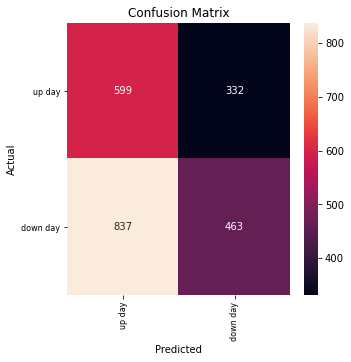

In [58]:
import seaborn as sns
cm = confusion_matrix(actual, [1 if p > 0 else 0 for p in predicted])
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, ax = ax, fmt='g')

ax.set_title('Confusion Matrix') 
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['up day','down day'])
ax.yaxis.set_ticklabels(['up day','down day'])
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 8)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 8)  
plt.show()
  

# Conclusion

The following conclusion can be drawn from this:
    
    
    • Multiple classifier systems are more accurate than those of single classifier systems. 
    
    • Using Hidden Markov Models for sequence classification will improve the classification accuracy of time series    classifiers, only if you have data for it.
    
    • The low classification accuracy we have, the more improvement we get. 